In [1]:
from qutip import *
from qutip.measurement import measure, measurement_statistics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'white'

def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for
    a harmonic oscillator mode.
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4,4))

    if isket(rho):  # ket状態を密度関数にする（必要かわからん）
        rho = ket2dm(rho)
    
    xvec = np.linspace(-5,5,100)

    W = wigner(rho, xvec, xvec)
    wlim = abs(W).max()

    ax.contourf(2*xvec/np.sqrt(np.pi), 2*xvec/np.sqrt(np.pi), W, 60, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel(r'$q/\sqrt{\pi}$', fontsize=16)
    ax.set_ylabel(r'$p/\sqrt{\pi}$', fontsize=16)
    #ax.set_title()
    fig.tight_layout
    
    return fig, ax

In [2]:
def rotation(dim, phi):
    a = destroy(dim)
    op = 1j * phi * a.dag() * a
    return op.expm()

def interaction(dim, phi, m):
    # definition of operators and a Hamiltonian
    a = tensor(destroy(dim), qeye(dim))
    b = tensor(qeye(dim), destroy(dim))
    H = g * (np.pi/2) * (a.dag()**2 * b + a**2 * b.dag()) + delta * a.dag() * a
    
    # preparation of a measurement operator
    z_plus = fock_dm(2,0)
    z_minus = fock_dm(2,1)
    P = [tensor(z_plus, qeye(dim)), tensor(z_minus, qeye(dim))]
    
    # solve the master equation and measurement by the measurement operator
    time = [0,1]
    result = mesolve(H, phi, time, [], [])
    collapsed_states, probs = measurement_statistics(result.states[1], P)
    
    return collapsed_states[m].ptrace(1)

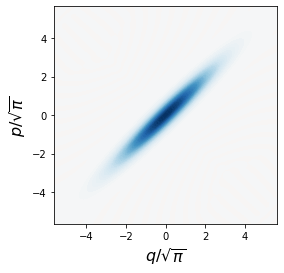

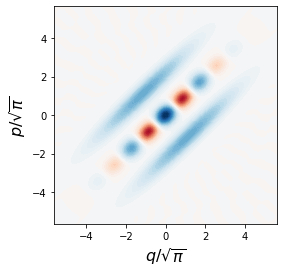

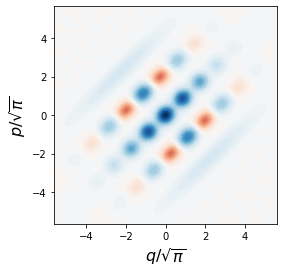

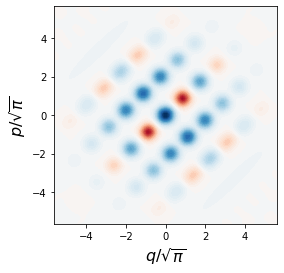

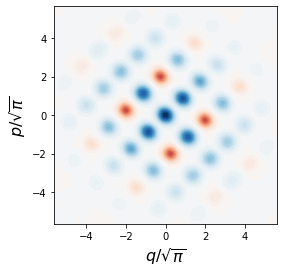

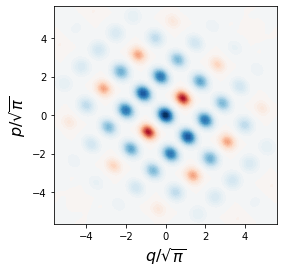

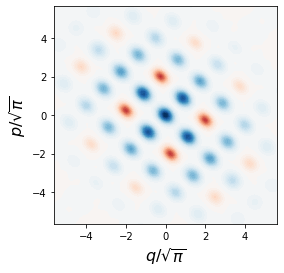

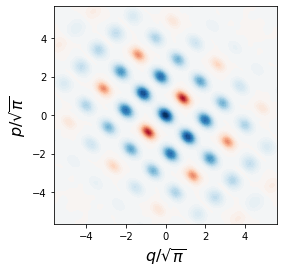

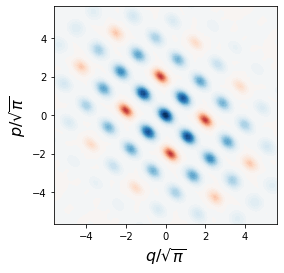

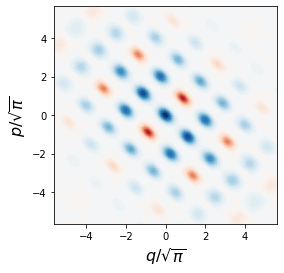

In [26]:
dim = 50
x = fock_dm(2,1)
psi = [ket2dm(squeeze(dim, -1) * coherent(dim,0))] 

for i in range(10):
    s = 2
    psi.append(interaction(dim, tensor(x, psi[s*i+0]), 1))
    psi.append(interaction(dim, tensor(x, psi[s*i+1]), 1))

for i in range(10):
    plot_wigner(psi[i])

一応GKPっぽいのができたが、trimをもう少し理解しないといけない